In [1]:
!qstat -u medirz90


p0085.ten.osc.edu:
                                                                               Req'd  Req'd   Elap 
Job id               Username Queue    Name                 SessID NDS   TSK   Memory Time Use S Time 
-------------------- -------- -------- -------------------- ------ ----- ----- ------ ----- - -----
23925636             medirz90 condo-os ondemand/sys/dashboa --         1     2     -- 02:00 C 02:00
23926020             medirz90 condo-os ondemand/sys/dashboa --         1     2     -- 01:00 R 00:01


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, '/users/PHS0336/medirz90/github/LSSutils')
from lssutils.theory.cell import Spectrum, init_sample
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
from scipy.integrate import quad
import numpy as np
import nbodykit.cosmology as cosmology

In [4]:
cosmo = cosmology.Cosmology()

In [5]:
chi = cosmo.comoving_distance

In [6]:
z, b, dNdz = init_sample('lrg')

lrg


In [7]:
nz_spl = IUS(z, dNdz, ext=1)

In [8]:
dNdz_norm = quad(nz_spl, *np.percentile(z, [0, 100]), limit=100)[0]
dNdz_norm

39.77485539251425

In [12]:
sp = Spectrum()
sp.add_tracer(z, b, dNdz)

h         : 0.67556
T0_cmb    : 2.7255
Omega0_b  : 0.0482754208891869
Omega0_cdm: 0.26377065934278865
N_ur      : None
m_ncdm    : [0.06]
P_k_max   : 10.0
P_z_max   : 100.0
sigma8    : 0.8225
gauge     : synchronous
n_s       : 0.9667
nonlinear : False
p = 1.0


In [25]:
r = np.linspace(sp.Dc(0.01), sp.Dc(2.0), 1000)

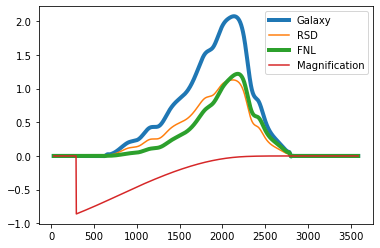

In [35]:
plt.plot(r, sp.fr_wk(r), lw=4, label='Galaxy')
plt.plot(r, sp.fr_wrk(r), label='RSD')
plt.plot(r, sp.fr_wkfnl1(r)+sp.fr_wkfnl2(r), lw=4, label='FNL')
plt.plot(r, sp.fr_wkmag(r), label='Magnification')
plt.legend()

In [9]:
nz = IUS(z, dNdz/dNdz_norm)

In [10]:
s = 0.999
z_g = np.linspace(0.1, 1.5, 140)


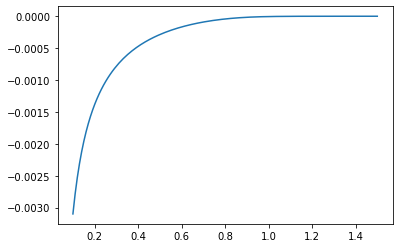

In [12]:
plt.plot(z, w_mag)